# Exercício 11 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation, graph_fittedData
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9562461972236633, 1.0532924844023169e-16)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/EleventhMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

           0          1          2          3
0 -11.336262 -16.063762 -13.306997 -14.122052
1  -8.086101  -9.663692  -4.287411 -10.535400
2  -3.800414  -5.579697  -3.773625  -6.325658
3  -5.033424  -5.254288  -3.796148  -7.277235
4  -5.677180  -7.224019  -0.514728  -4.075764


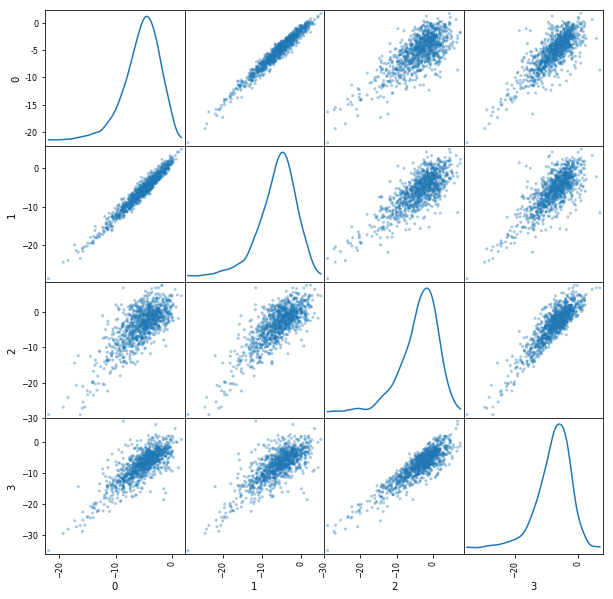

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1982,0.9955,0.9555,7.495e-17
1,0.1399,0.6332,0.9631,3.2456e-15
2,0.2506,0.8651,0.9285,1.9777e-21
3,0.2364,1.8095,0.9494,4.8453e-18


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.10651159286499023 seconds


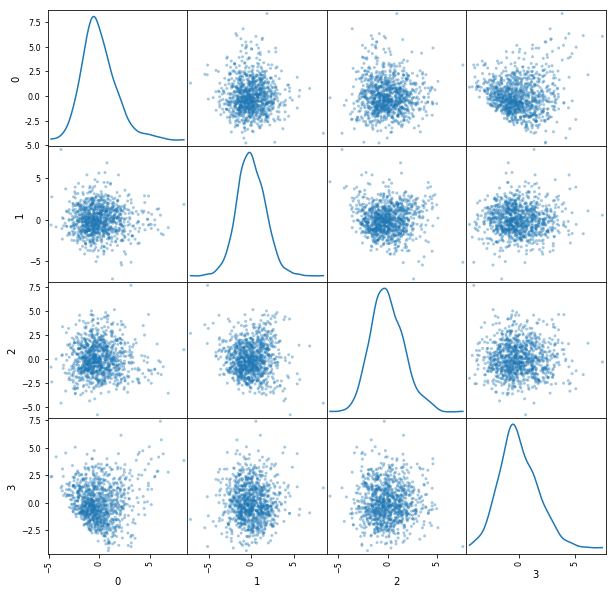

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3007,0.9025,0.966,1.6131e-14
1,0.3,0.1062,0.9907,5.5872e-06
2,0.2671,0.087,0.9908,6.5997e-06
3,0.1988,0.2921,0.9889,7.3191e-07


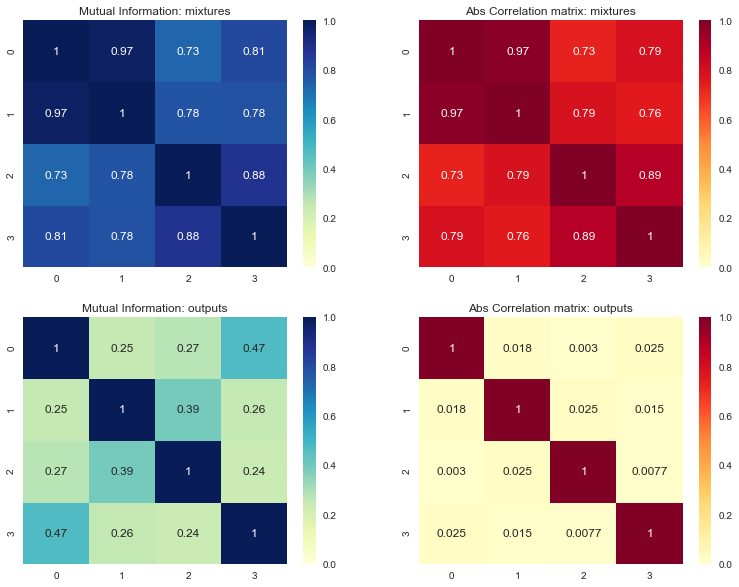

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-5, decayRate = 1e-5, runs  = 1) 

Execution time: 0.11801457405090332 seconds


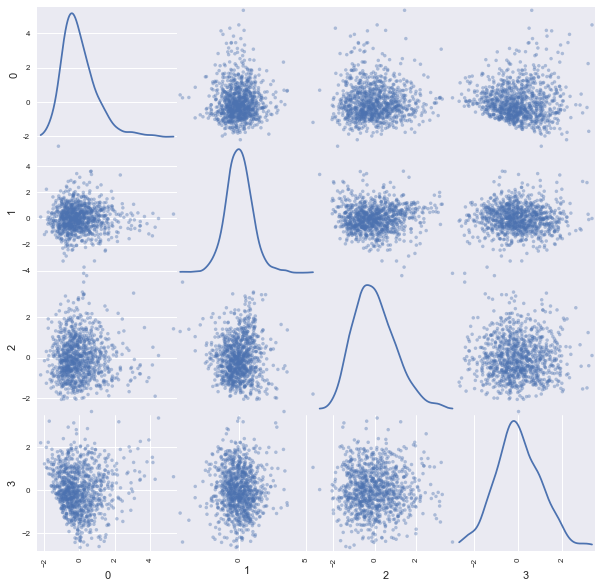

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2509,0.7884,0.9248,6.0612e-22
1,0.429,0.4793,0.9816,6.3182e-10
2,0,0.3885,0.9804,2.3955e-10
3,0,1.4956,0.9966,0.027524


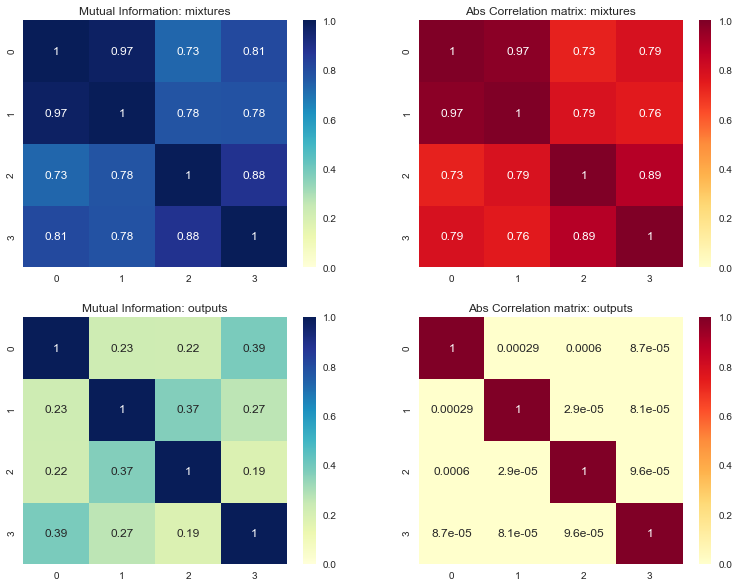

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-6, runs = 1)

Execution time: 0.09601187705993652 seconds


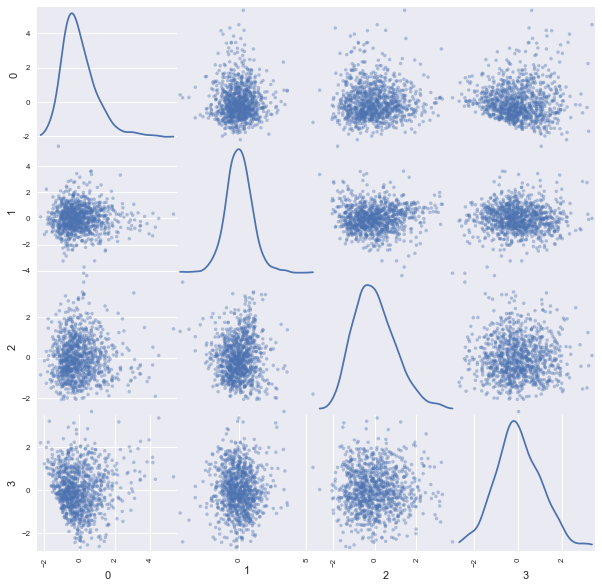

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1869,1.0434,0.9247,5.9298e-22
1,0.4462,0.3421,0.9816,6.128e-10
2,0.0635,0.1364,0.9804,2.3373e-10
3,0,0.0549,0.9966,0.028391


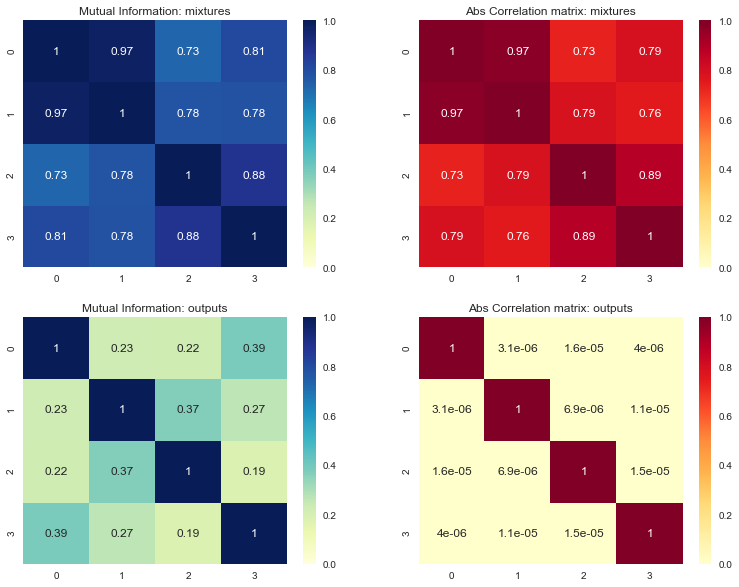

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

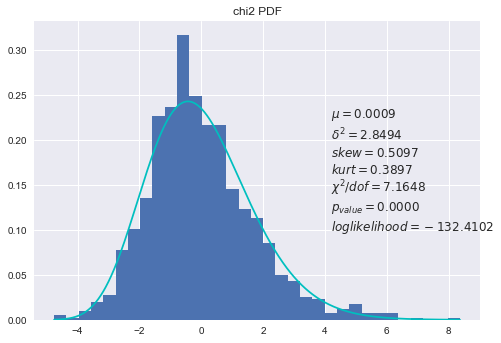

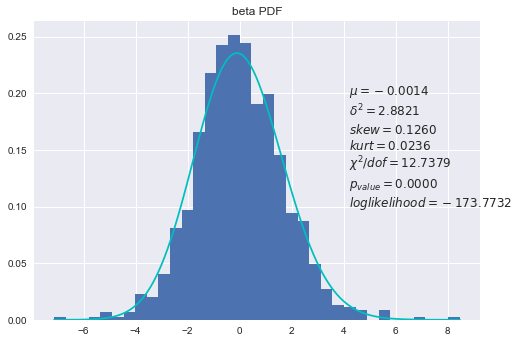

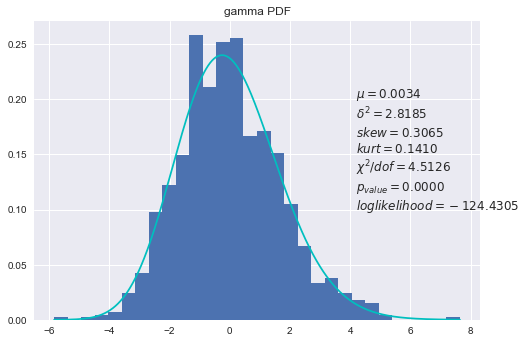

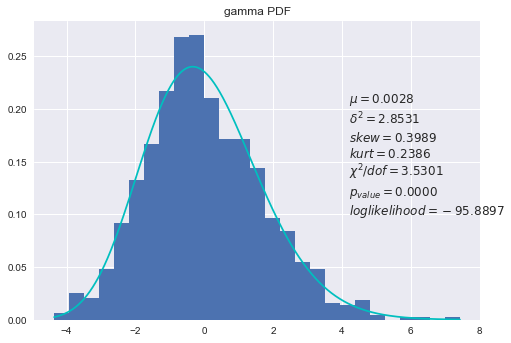

In [15]:
for i, y in enumerate(yNPCA):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedback network

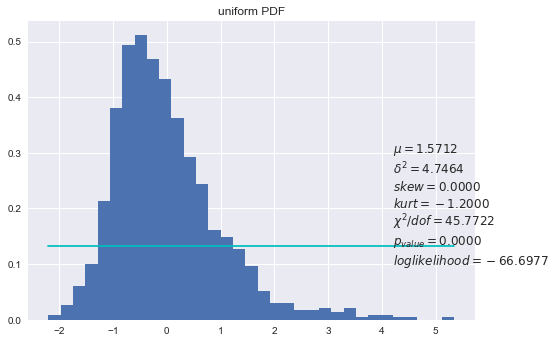

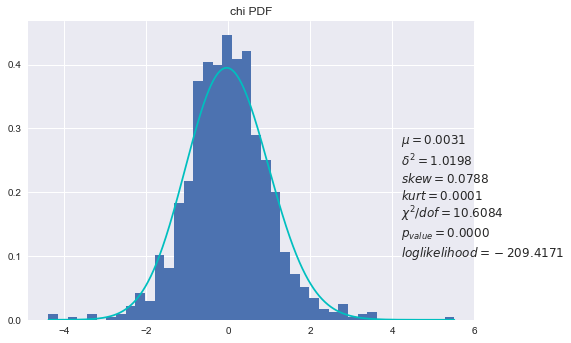

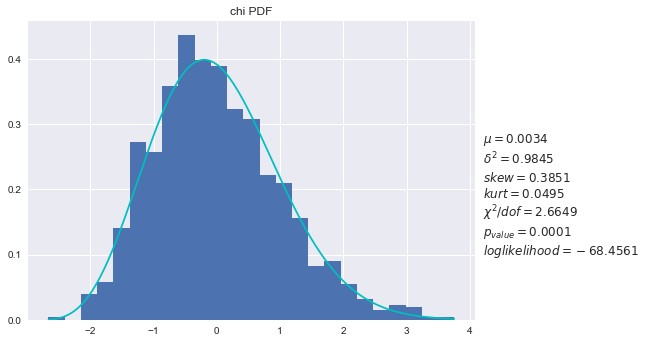

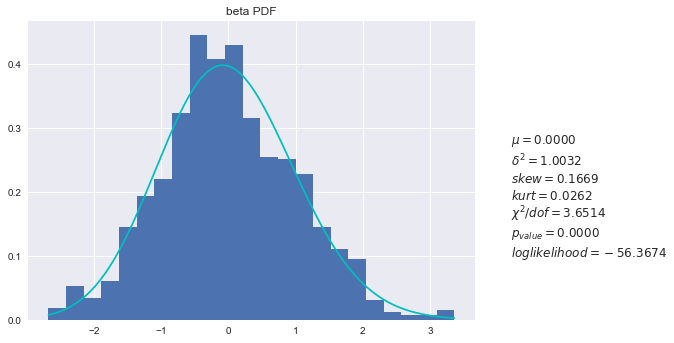

In [16]:
for i, y in enumerate(yFeedback):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedforward network

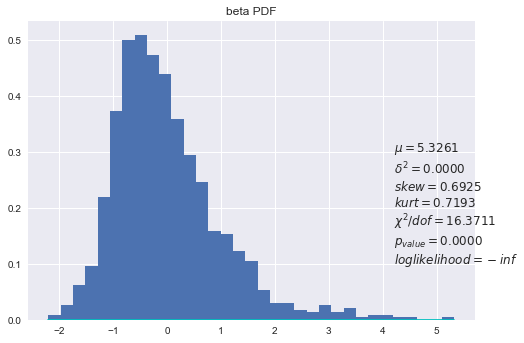

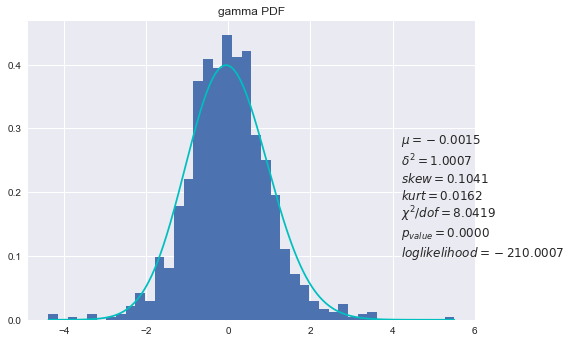

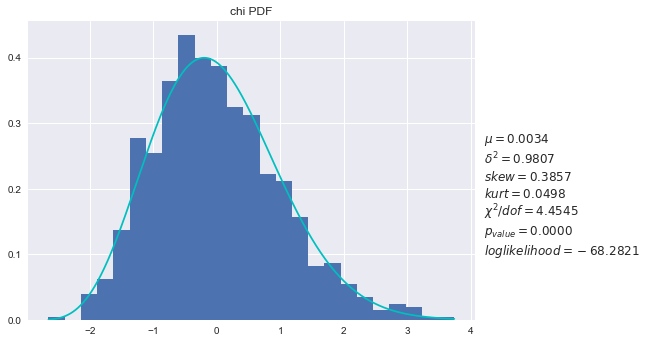

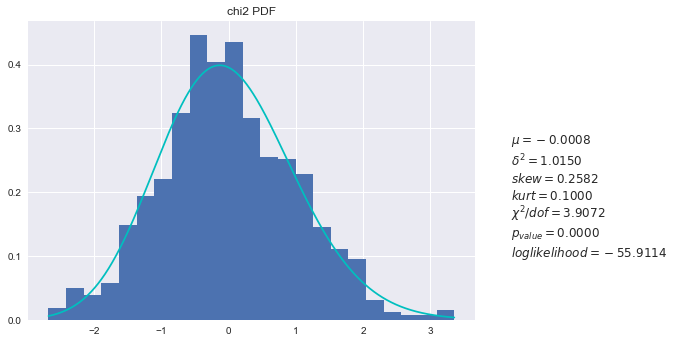

In [17]:
for i, y in enumerate(yFeedforward):
    graph_fittedData(y)